# <center> **COMMENT CONSTRUIRE, EVALUER ET SELECTIONNER EFFICACEMENT UN MODELE DE MACHINE LEARNING ?**

Par [Josué AFOUDA](https://afouda-datascience.com/)

Regardez la [vidéo YouTube](https://youtu.be/idPDzWybHMw) pour davantages d'explications sur ce tutoriel.

# <font color=red> Objectifs - Etapes

* **Analyse exploratoire des données** ;

* **Gestion des valeurs manquantes** ;

* **Gestion des valeurs aberrantes (*outliers*)** ;

* **Autres étapes possibles de prétraitement des données** ;

* **Division de l'ensemble des données (données d'entraînement, de validation et de test)** ;

* **Construction de plusieurs modèles à partir de différents algorithmes de Machine Learning** ;

* **Comparaison des performances des algorithmes** ;

* **Sélection et Evaluation du modèle final**.

# <font color=red> Importation des librairies et des données

In [ ]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = df.drop(['alive', 'who', 'embarked', 'class', 'deck'], axis = 1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


# <font color=red> Visualisation des données

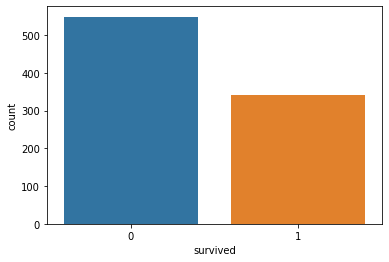

In [ ]:
sns.countplot(x = 'survived', data=df);

In [ ]:
df['survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

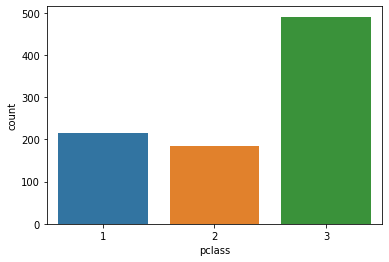

In [ ]:
sns.countplot(x = 'pclass', data=df);

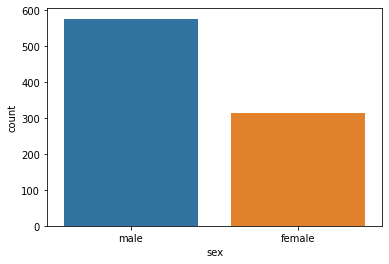

In [ ]:
sns.countplot(x = 'sex', data=df);

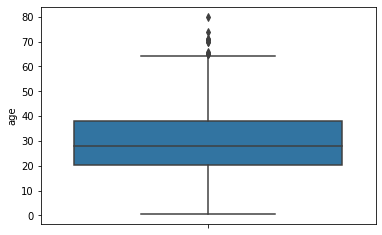

In [ ]:
sns.boxplot(y = 'age', data = df);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


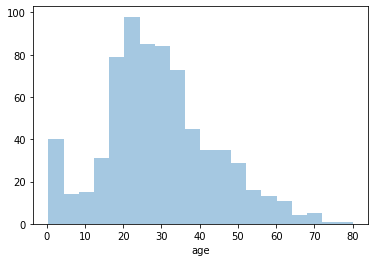

In [ ]:
sns.distplot(df['age'], kde=False, bins=20);

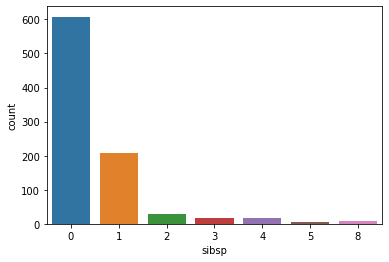

In [ ]:
sns.countplot(x = 'sibsp', data=df);

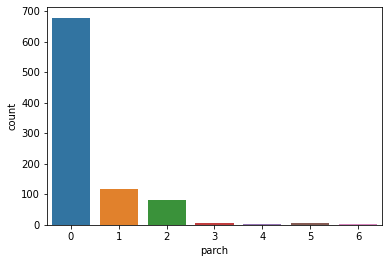

In [ ]:
sns.countplot(x = 'parch', data=df);

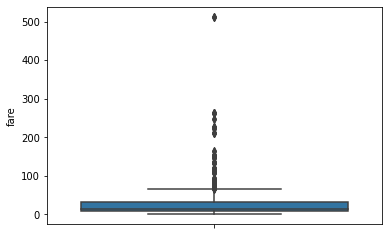

In [ ]:
sns.boxplot(y = 'fare', data = df);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


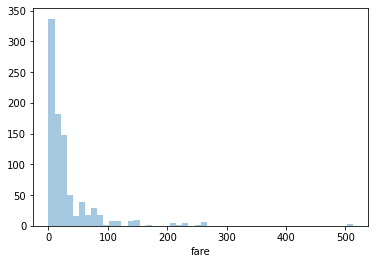

In [ ]:
sns.distplot(df['fare'], kde=False);

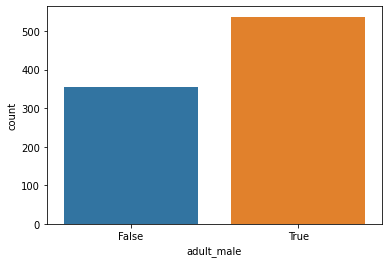

In [ ]:
sns.countplot(x = 'adult_male', data=df);

In [ ]:
pd.crosstab(df['sex'], df['adult_male'])

adult_male,False,True
sex,,
female,314,0
male,40,537


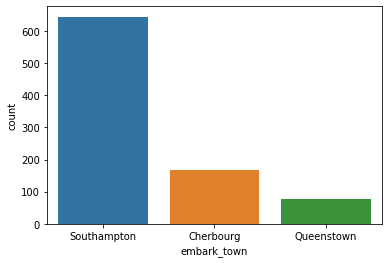

In [ ]:
sns.countplot(x = 'embark_town', data=df);

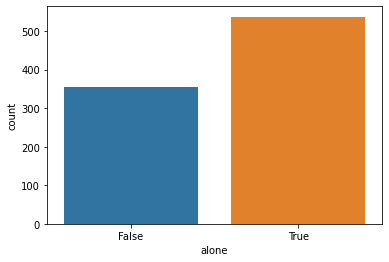

In [ ]:
sns.countplot(x = 'alone', data=df);

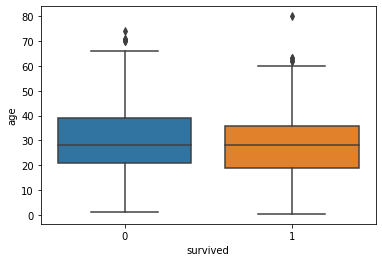

In [ ]:
# Relation entre âge et variable cible

sns.boxplot(x = 'survived', y = 'age', data=df);

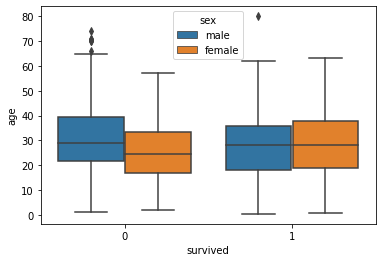

In [ ]:
sns.boxplot(x = 'survived', y = 'age', hue = 'sex', data=df);

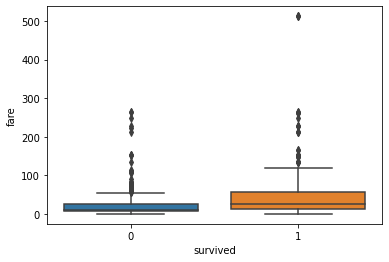

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', data = df);

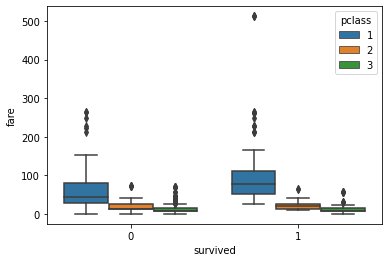

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', hue = 'pclass', data = df);

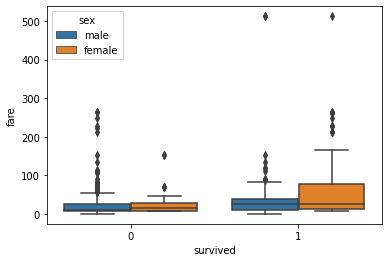

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', hue = 'sex', data = df);

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['fare'].quantile(0.99)

249.00622000000033

# <font color=red> Nettoyage des données

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [ ]:
df.fillna(value={'age':df['age'].median()}, inplace=True)

In [ ]:
df['age'].std()

13.019696550973194

In [ ]:
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [ ]:
df.fillna(value={'embark_town':'Southampton'}, inplace=True)

In [ ]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [ ]:
# valeur < Q1 - 1,5*IQR ou valeur > Q3 + 1,5*IQR

def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr 
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [ ]:
finding_outliers(df, 'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.0,1,0,66.6000,True,Southampton,False
151,1,1,female,22.0,1,0,66.6000,False,Southampton,False
369,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
846,0,3,male,28.0,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True


In [ ]:
iqr_fare = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
df['fare'].quantile(0.75) + 1.5* iqr_fare

65.6344

In [ ]:
df.loc[(finding_outliers(df, 'fare').index, 'fare')] = df['fare'].quantile(0.75) + 1.5 * iqr_fare

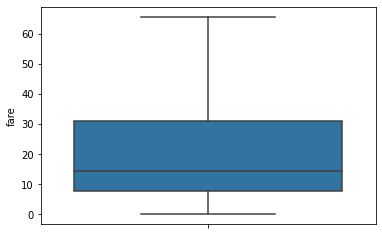

In [ ]:
sns.boxplot(y = 'fare', data=df);

In [ ]:
df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

2.5

In [ ]:
df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

54.5

In [ ]:
finding_outliers(df, 'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [ ]:
df.loc[df['age'] < df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 
       'age'] = df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

df.loc[df['age'] > df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 
       'age'] = df['age'].quantile(0.55) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

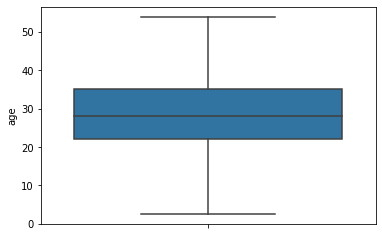

In [ ]:
sns.boxplot(y = 'age', data=df);

In [ ]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


# <font color=red> Préparation des données

In [ ]:
df['sex'].replace({'female':0, 'male':1}, inplace = True)

In [ ]:
df['alone'] = df['alone'].astype('int')
df['adult_male'] = df['adult_male'].astype('int')

In [ ]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
embark_dummies = pd.get_dummies(df['embark_town'], drop_first=True)
embark_dummies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
df = pd.concat([df, embark_dummies], axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,0,1


In [ ]:
del df['embark_town']

In [ ]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1


In [ ]:
df['family'] = df['sibsp'] + df['parch']

df.drop(['sibsp', 'parch'], axis=1, inplace=True)

df.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0


In [ ]:
# Division des données 60% train, 20% validation, 20% test

from sklearn.model_selection import train_test_split
seed = 111
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, 
                                                    random_state = seed, stratify=y_test)

In [ ]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [ ]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: survived, dtype: float64

In [ ]:
# Normalisation


In [ ]:
# Méthode de sur-échantillonnage (upsampling)

from sklearn.utils import resample

X2 = X_train
X2['survived'] = y_train.values
X2.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0


In [ ]:
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

minority_upsampled = resample(minority, replace=True, n_samples = len(majority))

minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
133,2,0,29.0,26.0000,0,0,0,1,1,1
322,2,0,30.0,12.3500,0,1,1,0,0,1
248,1,1,37.0,52.5542,1,0,0,1,2,1
821,3,1,27.0,8.6625,1,1,0,1,0,1
28,3,0,28.0,7.8792,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
306,1,0,28.0,65.6344,0,1,0,0,0,1
279,3,0,35.0,20.2500,0,0,0,1,2,1
615,2,0,24.0,65.0000,0,0,0,1,3,1
28,3,0,28.0,7.8792,0,1,1,0,0,1


In [ ]:
majority.shape

(329, 10)

In [ ]:
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
149,2,1,42.0,13.0000,1,1,0,1,0,0
249,2,1,54.0,26.0000,1,0,0,1,1,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
306,1,0,28.0,65.6344,0,1,0,0,0,1
279,3,0,35.0,20.2500,0,0,0,1,2,1
615,2,0,24.0,65.0000,0,0,0,1,3,1
28,3,0,28.0,7.8792,0,1,1,0,0,1


In [ ]:
upsampled['survived'].value_counts(normalize = True)

1    0.5
0    0.5
Name: survived, dtype: float64

In [ ]:
X_train_up = upsampled.drop('survived', axis=1)
y_train_up = upsampled['survived']

In [ ]:
# Méthode de sous-échantillonnage

majority_downsampled = resample(majority, replace=False, n_samples = len(minority))

majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
145,2,1,19.0,36.7500,1,0,0,1,2,0
482,3,1,50.0,8.0500,1,1,0,1,0,0
563,3,1,28.0,8.0500,1,1,0,1,0,0
721,3,1,17.0,7.0542,1,0,0,1,1,0
253,3,1,30.0,16.1000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
45,3,1,28.0,8.0500,1,1,0,1,0,0
63,3,1,4.0,27.9000,0,0,0,1,5,0
613,3,1,28.0,7.7500,1,1,1,0,0,0
24,3,0,8.0,21.0750,0,0,0,1,4,0


In [ ]:
downsampled = pd.concat([minority, majority_downsampled])
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
151,1,0,22.0,65.6344,0,0,0,1,1,1
788,3,1,2.5,20.5750,0,0,0,1,3,1
609,1,0,40.0,65.6344,0,1,0,1,0,1
697,3,0,28.0,7.7333,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
45,3,1,28.0,8.0500,1,1,0,1,0,0
63,3,1,4.0,27.9000,0,0,0,1,5,0
613,3,1,28.0,7.7500,1,1,1,0,0,0
24,3,0,8.0,21.0750,0,0,0,1,4,0


In [ ]:
X_train_down = downsampled.drop(['survived'], axis=1)
y_train_down = downsampled['survived']

# <font color=red> Modélisation

In [ ]:
# Sélection de variables importantes

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state = seed)

rf.fit(X_train_up, y_train_up)

accuracy_score(y_val, rf.predict(X_val))

0.7640449438202247

In [ ]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.07850644 0.11030756 0.2464464  0.23998226 0.20318128 0.01199968
 0.0077422  0.02236603 0.07946815]


In [ ]:
vars_imp = pd.Series(rf.feature_importances_, index = X_train_up.columns).sort_values(ascending=False)
vars_imp

age            0.246446
fare           0.239982
adult_male     0.203181
sex            0.110308
family         0.079468
pclass         0.078506
Southampton    0.022366
alone          0.012000
Queenstown     0.007742
dtype: float64

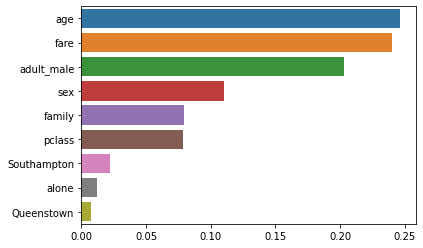

In [ ]:
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.show()

In [ ]:
vars_non_imp = ['Queenstown']

X_train_up = X_train_up.drop(vars_non_imp, axis=1)
X_val = X_val.drop(vars_non_imp, axis=1)
X_test = X_test.drop(vars_non_imp, axis=1)

In [ ]:
# Régression logistique

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state= seed, max_iter=500)

lr_hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

lr_cv = GridSearchCV(lr, lr_hyp, cv = 5)

lr_cv.fit(X_train_up, y_train_up)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.8282442748091603
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Forêt aléatoire

RF = RandomForestClassifier(random_state=seed)

RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200],
          'max_depth':[None, 2, 5, 10, 15, 20]}

RF_cv = GridSearchCV(RF, RF_hyp, cv = 5)

RF_cv.fit(X_train_up, y_train_up)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

0.8860282211427248
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)


In [ ]:
# SVM 

from sklearn.svm import SVC

sv = SVC(random_state = seed)

sv_hyp = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}

svm_cv = GridSearchCV(sv, sv_hyp, cv = 5)

svm_cv.fit(X_train_up, y_train_up)

print(svm_cv.best_score_)

print(svm_cv.best_estimator_)

0.8130927596576452
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=111, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=seed)

bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}

bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)

bc_cv.fit(X_train_up, y_train_up)

print(bc_cv.best_score_)

print(bc_cv.best_estimator_)

0.8784293314827666
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=111, verbose=0,
                  warm_start=False)


In [ ]:
# Evaluation des performances et choix du modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(y_val, pred)
  print('Score global du modèle :', round(score, 3))

In [ ]:
models = [lr_cv.best_estimator_, RF_cv.best_estimator_, 
          svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models:
  print('Modèle ' + str(model))
  model_evaluation(model, X_val, y_val)
  print('-'*90)

Modèle LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score global du modèle : 0.747
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=Fal

In [ ]:
# Performance du meilleur modèle sur les données de test

accuracy_score(y_test, RF_cv.best_estimator_.predict(X_test))

0.8044692737430168